In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.transform_xy import geo2imagexy


In [2]:
path_vector = config.root_proj + '/data/tibet/tibet_tiles_vec/tibet_tiles.gpkg'
tiles_gdf = gpd.read_file(path_vector)
tiles_gdf.head()


/home/yons/miniconda3/envs/venv-luo/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,area,proj,tile_id,geometry
0,10852.910371,EPSG: 32646,001,"MULTIPOLYGON (((91.60292 25.97742, 91.60292 26..."
1,10856.066053,EPSG: 32646,002,"MULTIPOLYGON (((92.59904 25.97742, 92.59904 26..."
2,10853.222782,EPSG: 32647,003,"MULTIPOLYGON (((97.64819 25.97742, 97.64819 26..."
3,10856.025776,EPSG: 32647,004,"MULTIPOLYGON (((98.64468 25.97742, 98.64468 26..."
4,10850.995157,EPSG: 32647,005,"MULTIPOLYGON (((99.64905 25.97742, 99.64905 26..."


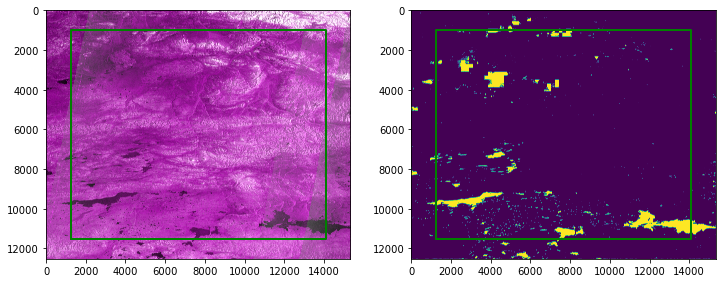

In [13]:
# ## check the prediction water map
# ## -- data path
tile_id = '239'
path_s1_img = config.root_tb_data + '/tibet-202008/s1_descend/tibet_s1des_202008_tile_' + tile_id + '.tif'
path_wat = config.root_tb_data + '/tibet-202008/s1_water/tibet_s1_202008_tile_' + tile_id + '_water.tif'
## -- data read
s1_img_tile, s1_img_tile_info = readTiff(path_in = path_s1_img)
s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
## -- data visualization
plt.figure(figsize=(12, 6))
## plot s1 image
plt.subplot(1,2,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2)
# outline
idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds
outline_lon = [tile_region[0], tile_region[2], tile_region[2], tile_region[0], tile_region[0]]  
outline_lat = [tile_region[1], tile_region[1], tile_region[3], tile_region[3], tile_region[1]]
outline_row, outline_col = geo2imagexy(x=np.array(outline_lon), \
                        y=np.array(outline_lat), gdal_trans=s1_img_tile_info['geotrans'])
plt.plot(outline_col, outline_row, color='g', linewidth=2)
## plot water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2)
plt.plot(outline_col, outline_row, color='g', linewidth=2)



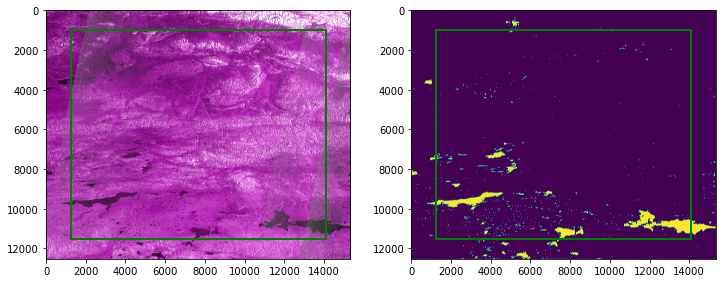

In [14]:
# ## check the prediction water map
# ## -- data path
# tile_id = '218'
path_wat = config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_' + tile_id + '_water.tif'
## -- data read
s1_tile_wat_, s1_tile_wat_info_ = readTiff(path_in = path_wat)
## -- data visualization
plt.figure(figsize=(12,6))
## plot s1 image
plt.subplot(1,2,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2)
plt.plot(outline_col, outline_row, color='g', linewidth=2)
## plot water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat_, color_bands=(0,1,0), clip_percent=2)
plt.plot(outline_col, outline_row, color='g', linewidth=2)



### Zoom in visualization

Text(0.5, 1.0, 'new model')

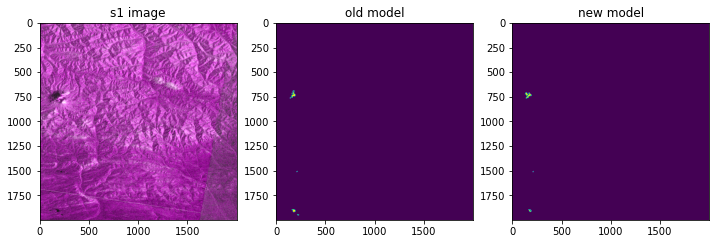

In [15]:
plt.figure(figsize=(12,5))
# region = [0,2000,7000,9000]
region = [6000,8000,12000,14000]
plt.subplot(1,3,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2, focus=region)
plt.title('s1 image')
## plot water map
plt.subplot(1,3,2)
imgShow(s1_tile_wat_, color_bands=(0,1,0), clip_percent=2, focus=region)
plt.title('old model')
plt.subplot(1,3,3)
imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2, focus=region)
plt.title('new model')

